# SVM练习
## 加载和浏览数据集

In [9]:
quality=read.csv("/home/jerrywang/GitHub/note_viajupyterbook/datas/Diabetes.csv")

In [10]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


MemberID是从1到131 对患者进行编号的唯一标识符。   
InpatientDays是住院次数或患者在医院度过的天数。   
ERVisits是患者访问急诊室的次数。   
OfficeVisits是患者拜访任何医生办公室的次数。   
Narcotics是患者对麻醉剂开出的处方数量。   
DaysSinceLastERVisit是患者上次急诊室（ER）到研究期结束之间的天数，如果患者从未去过ER，则将其设置为研究期的长度。   
Pain是患者抱怨疼痛的就诊次数。     
TotalVisits是患者拜访任何医疗保健提供者的总次数。      
ProviderCount是为患者提供服务的提供者的数量。    
MedicalClaims是患者提出医疗要求的天数。   
ClaimLines是医疗索赔的总数。   
StartedOnCombination是患者是否开始使用药物组合治疗糖尿病。   
AcuteDrugGapSmall是处方用完后迅速补充的急性药物的一部分。   
PoorCare是因变量，如果患者护理不佳，则等于1，如果患者护理得好，则等于0。   

In [11]:
percPC = sum(quality$PoorCare)/nrow(quality)
percPC

[1] 0.2519084

在SVM模型中，需要将因变量的值设为-1或1。将Poorcare 0更改为Poorcare -1

In [12]:
quality$PoorCare[which(quality$PoorCare==0)]=-1

将Poorcare更改为因子变量。

In [13]:
quality$PoorCare=as.factor(quality$PoorCare)
str(quality$PoorCare)

 Factor w/ 2 levels "-1","1": 1 1 1 1 1 2 1 1 2 1 ...


In [14]:
table(quality$PoorCare)


-1  1 
98 33 

## 分割数据集以进行培训和测试

In [15]:
library(caTools)

In [16]:
set.seed(123)
split = sample.split(quality$PoorCare, SplitRatio = 0.70)

In [17]:
qualityTrain = subset(quality, split == TRUE)
qualityTest = subset(quality, split == FALSE)

In [18]:
table(qualityTrain$PoorCare)


-1  1 
69 23 

In [19]:
table(qualityTest$PoorCare)


-1  1 
29 10 

## 建立SVM模型

现在，我们准备好使用OfficeVisits和Narcotics作为自变量来构建SVM模型，与上一讲一致。在此之前，让我们减少无用的变量。

In [20]:
Train=qualityTrain[,c(4,5,14)]
Test=qualityTest[,c(4,5,14)]

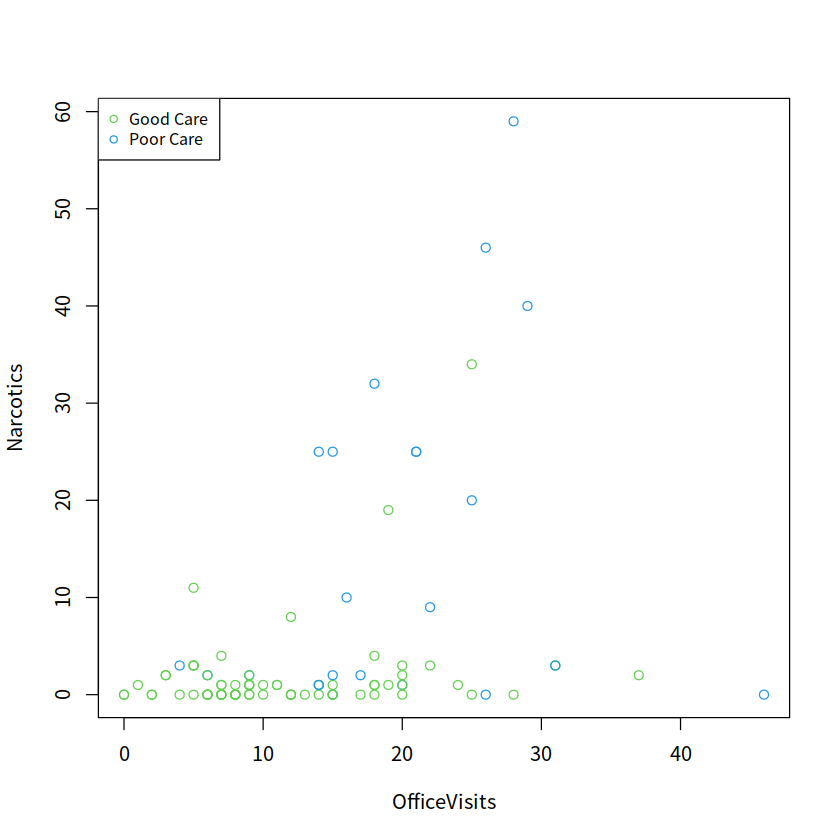

In [21]:
plot(Train[,c(-3)], col=(2+as.numeric(Train[,3])))
legend("topleft", legend=c("Good Care", "Poor Care"),     col=3:4, pch=1, cex=0.8)

装载包 "e1071"，这个包涵盖了潜在类分析，短时傅立叶变换，模糊聚类，支持向量机，最短路径计算，袋装聚类，朴素贝叶斯分类器等功能

In [22]:
library(e1071)

函数`svmfit`用于拟合SVM模型，第一个参数是模型的公式，在这里，我们仍然使用PoorCare〜OfficeVisits + Narcotics。二个参数指示用于训练模型的数据集。参数cost的意思是约束违反的成本，即惩罚因子C。scale=TRUE (default) 使数据在内部（x和y变量）均缩放为零均值和单位方差

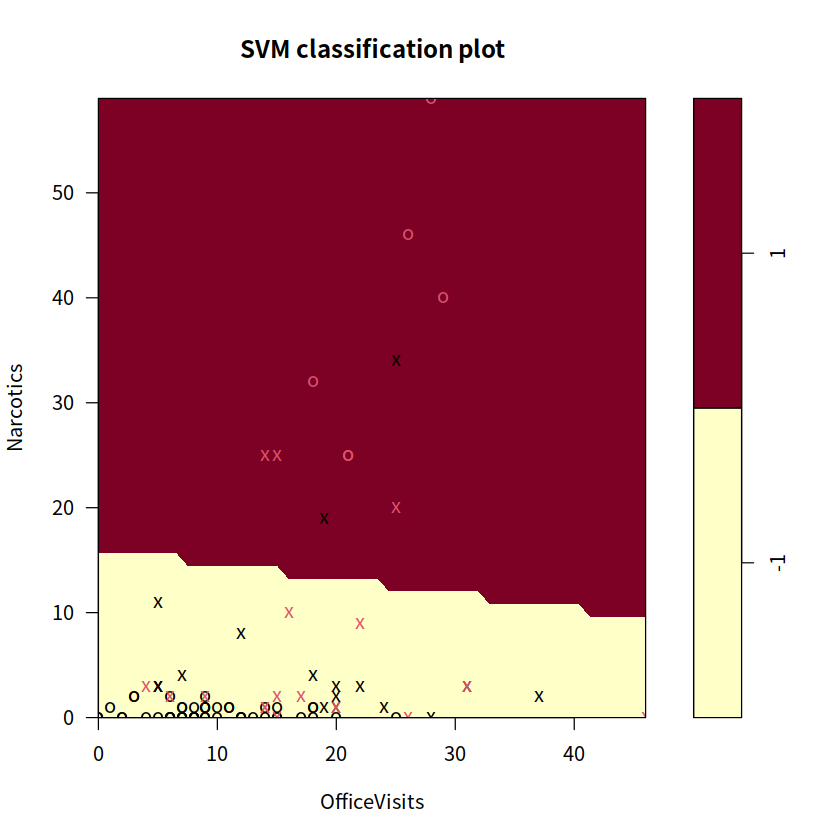

In [23]:
svmfit=svm(PoorCare ~Narcotics+ OfficeVisits, data=Train, kernel="linear", cost=10)
plot(svmfit, Train)

用`svmfit$index`列出支持的向量

In [24]:
svmfit$index

[1]  2  7  8  9 10 23 34 40 41 44 45 65 66 76 78 81 89 92  3  6 13 15 18 27 31
[26] 38 42 58 68 70 72 73 75 80 91

In [25]:
summary(svmfit)


Call:
svm(formula = PoorCare ~ Narcotics + OfficeVisits, data = Train, 
    kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  35

 ( 18 17 )


Number of Classes:  2 

Levels: 
 -1 1




选择一个更小的成本函数

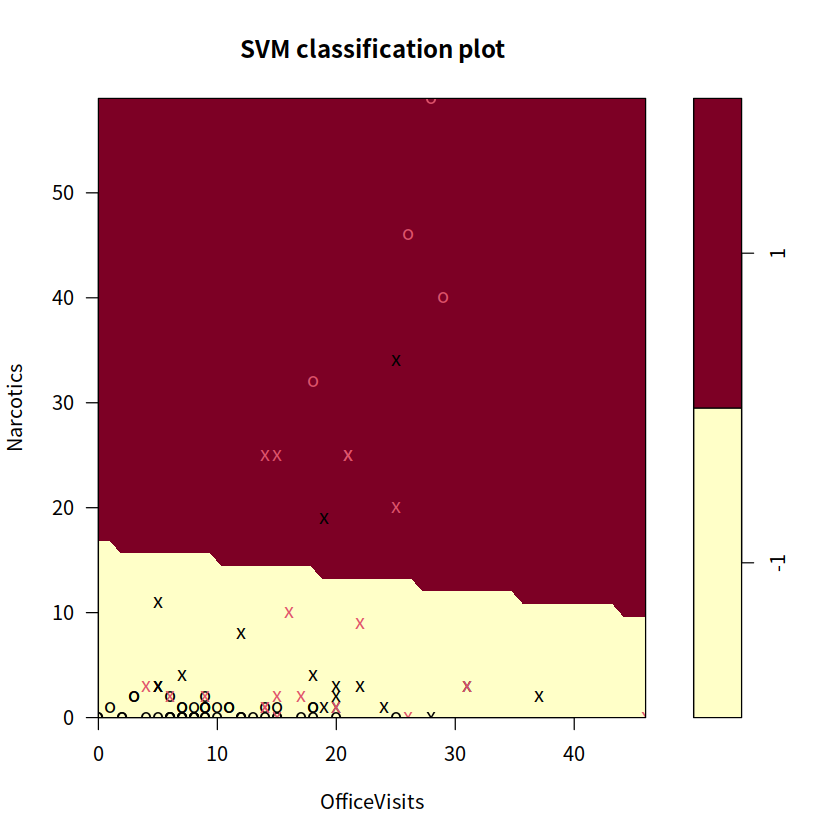

In [26]:
svmfit=svm(PoorCare ~Narcotics+ OfficeVisits, data=Train, kernel="linear", cost=1)
plot(svmfit, Train)

把线性的kernel换成RBF kernel。    
gamma可以看作是sigma的倒数（？）  exp(-gamma|x-z|^2)

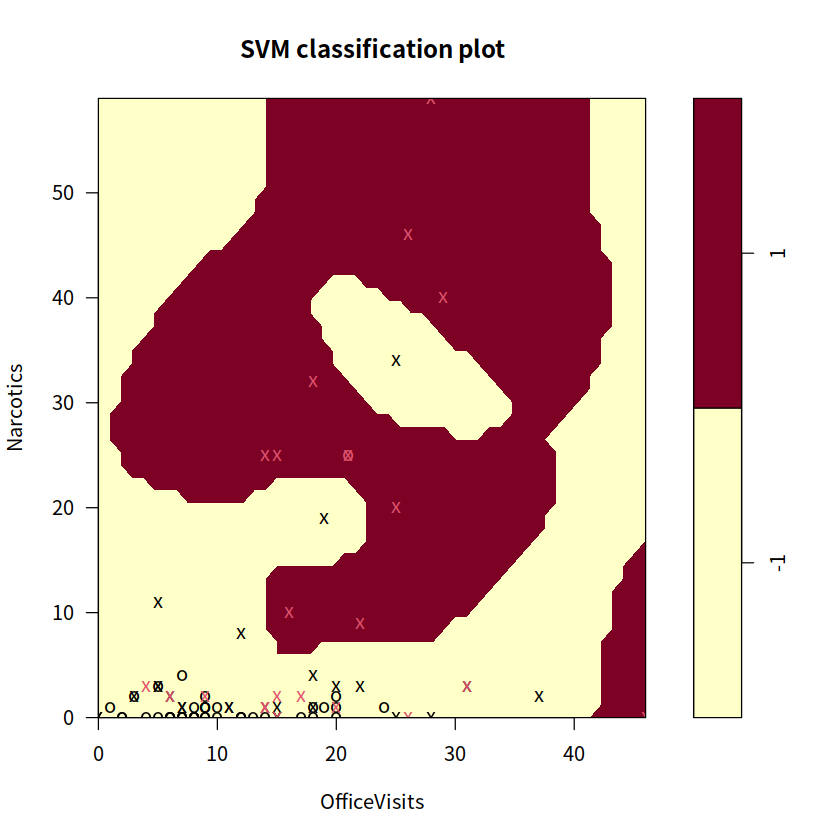

In [27]:
svmfit=svm(PoorCare ~Narcotics+ OfficeVisits, data=Train, kernel="radial",  gamma=2, cost=10)
plot(svmfit, Train)

选择更小的成本函数

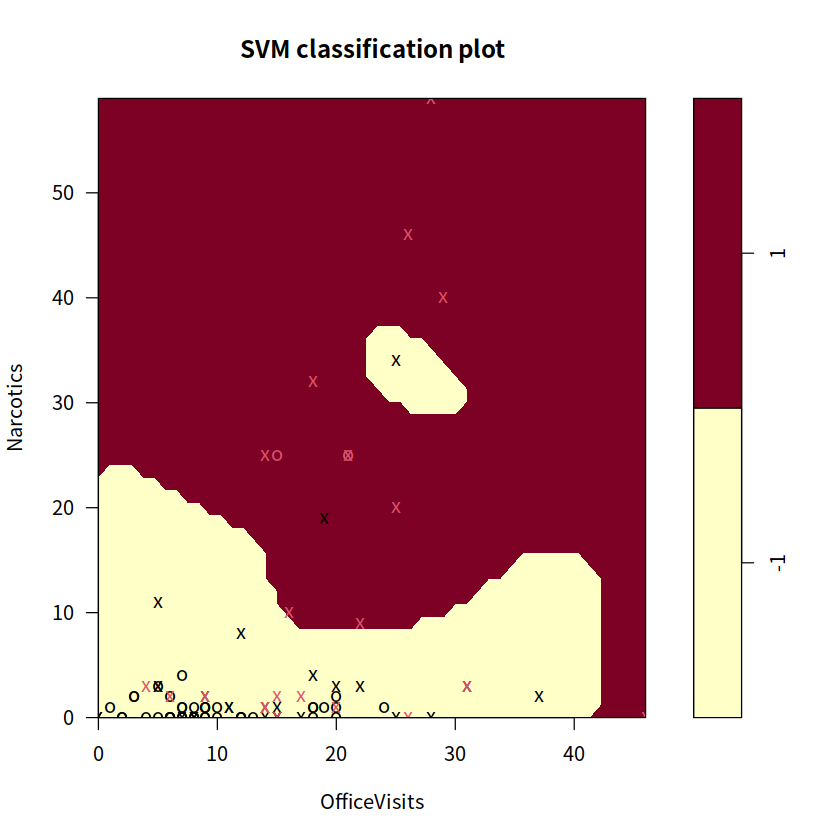

In [28]:
svmfit=svm(PoorCare ~Narcotics+ OfficeVisits, data=Train, kernel="radial",  gamma=2, cost=1)
plot(svmfit, Train)

## 样本内交叉验证

`tune()`函数可以帮助我们从一组选择中调整诸如`cost`，`kernel`，`gamma`等参数。这可能需要很多时间。

In [32]:
set.seed(123)
tune.out=tune(svm,PoorCare ~Narcotics+ OfficeVisits, data=Train, scale=TRUE, ranges=list(kernel=c("radial","polynomial","sigmoid"),cost=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),gamma=c(0.025,0.05,0.075,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1,1.2)))
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = PoorCare ~ Narcotics + OfficeVisits, 
    data = Train, ranges = list(kernel = c("radial", "polynomial", 
        "sigmoid"), cost = c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 
        0.9, 1), gamma = c(0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.5, 
        0.6, 0.7, 0.8, 0.9, 1, 1.2)), scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  0.5 
     coef.0:  0 

Number of Support Vectors:  41

 ( 21 20 )


Number of Classes:  2 

Levels: 
 -1 1




绘制最佳模型：

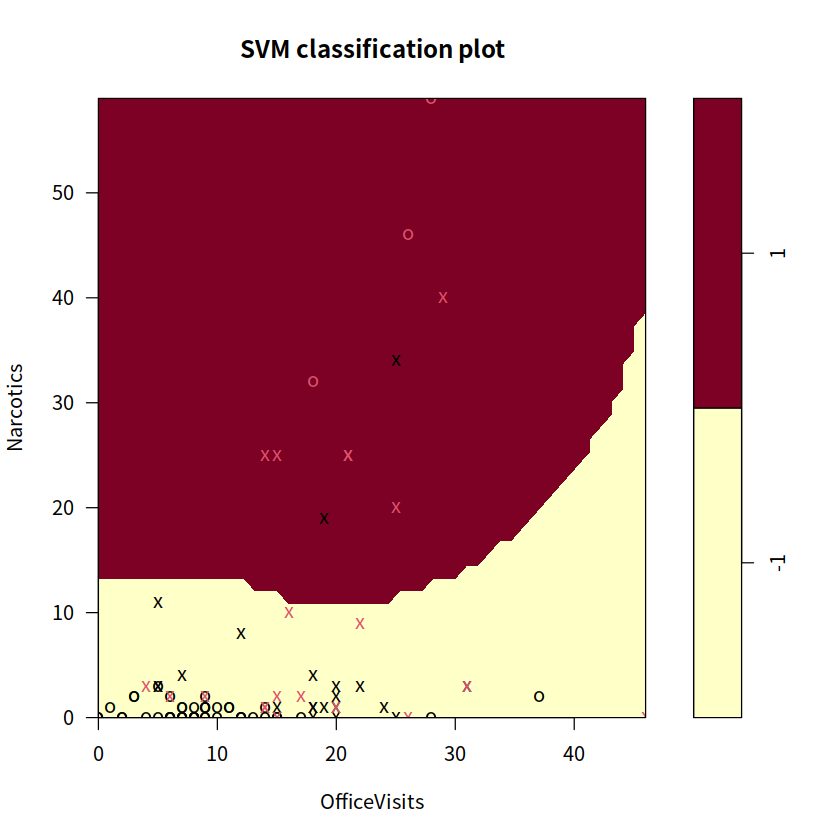

In [33]:
plot(bestmod, Train)

并且我们得到以下具有最佳模型的混淆矩阵。

In [34]:
predictTrain = predict(bestmod, type = "response")
conf1=table(Train$PoorCare, predictTrain)
conf1

    predictTrain
     -1  1
  -1 67  2
  1  14  9

样本内准确度是76/92 = 82.61％。

## 样本外模型测试

同样，我们可以使用测试数据集对模型进行样本外测试。我们首先在测试集中绘制数据：

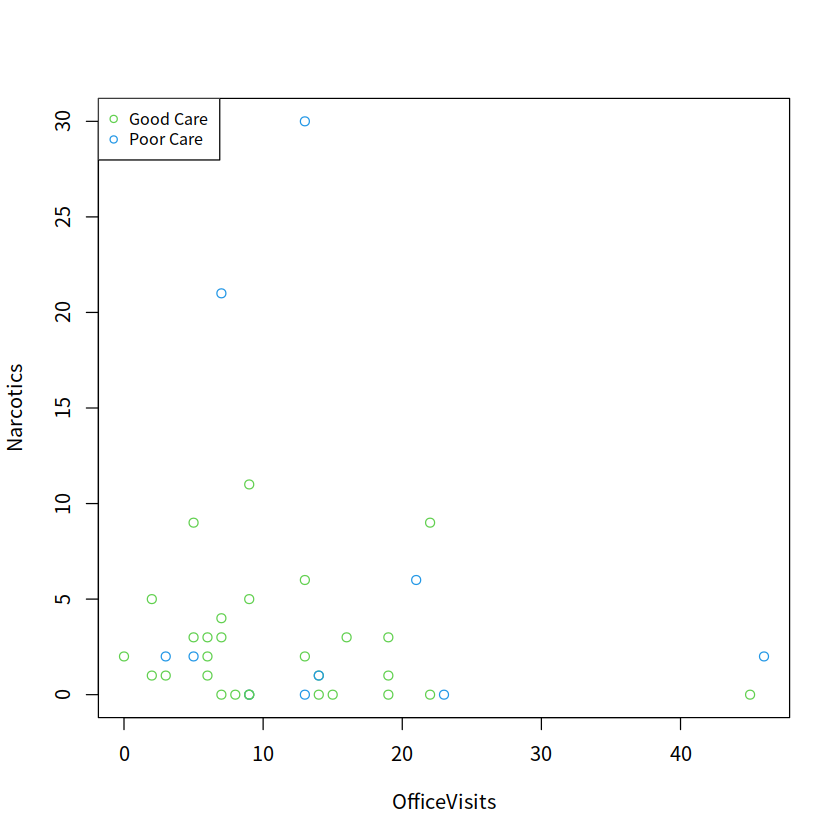

In [35]:
plot(Test[,c(-3)], col=(2+as.numeric(Test[,3])))
legend("topleft", legend=c("Good Care", "Poor Care"),     col=3:4, pch=1, cex=0.8)

并且我们得到以下具有最佳模型的混淆矩阵用于新的预测。

In [36]:
predictTest = predict(bestmod, type = "response", newdata = Test)
conf2=table(Test$PoorCare, predictTest)
conf2

    predictTest
     -1  1
  -1 29  0
  1   8  2

最佳模型的样本外准确性为31/39 = 79.49％。对于此特定数据集，SVM具有与逻辑回归相同的性能。